In [10]:
import kagglehub
import os

path = kagglehub.dataset_download("mujtabamatin/air-quality-and-pollution-assessment")
file = os.listdir(path)
print("Path to dataset files:", path) # 파일 경로 확인
print("Files in dataset directory:", file) # 파일명 확인

csv_path = os.path.join(path, file[0])

Path to dataset files: C:\Users\82108\.cache\kagglehub\datasets\mujtabamatin\air-quality-and-pollution-assessment\versions\2
Files in dataset directory: ['updated_pollution_dataset.csv']


#### 라이브러리

In [11]:
# data handling
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv(csv_path)

#### Key Features:

Temperature (°C) - 평균기온: Average temperature of the region.   
Humidity (%) - 습도: Relative humidity recorded in the region.   
PM2.5 Concentration (µg/m³) - 초미세먼지: Fine particulate matter levels.   
PM10 Concentration (µg/m³) - 미세먼지: Coarse particulate matter levels.   
NO2 Concentration (ppb) - 이산화질소: Nitrogen dioxide levels.   
SO2 Concentration (ppb) - 이산화황: Sulfur dioxide levels.   
CO Concentration (ppm) - 일산화탄소소: Carbon monoxide levels.   
Proximity to Industrial Areas (km) - 산업단지 근접도: Distance to the nearest industrial zone.   
Population Density (people/km²) - 인구밀도: Number of people per square kilometer in the region.   

### EDA

In [13]:
df.info()
df.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


,0,1,2,3,4
Temperature,29.8,28.3,23.1,27.1,26.5
Humidity,59.1,75.6,74.7,39.1,70.7
PM2.5,5.2,2.3,26.7,6.1,6.9
PM10,17.9,12.2,33.8,6.3,16.0
NO2,18.9,30.8,24.4,13.5,21.9
SO2,9.2,9.7,12.6,5.3,5.6
CO,1.72,1.64,1.63,1.15,1.01
Proximity_to_Industrial_Areas,6.3,6.0,5.2,11.1,12.7
Population_Density,319,611,619,551,303
Air Quality,Moderate,Moderate,Moderate,Good,Good


- 모든 행 not null
- pm10, so2 음수값 존재
- target: air_quality

In [14]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [18]:
df.describe()
X_columns = ['Temperature', 'Humidity', 
             'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
             'Proximity_to_Industrial_Areas', 'Population_Density']
y_columns = ["Air Quality"]
X = df[X_columns]
y = df[y_columns]

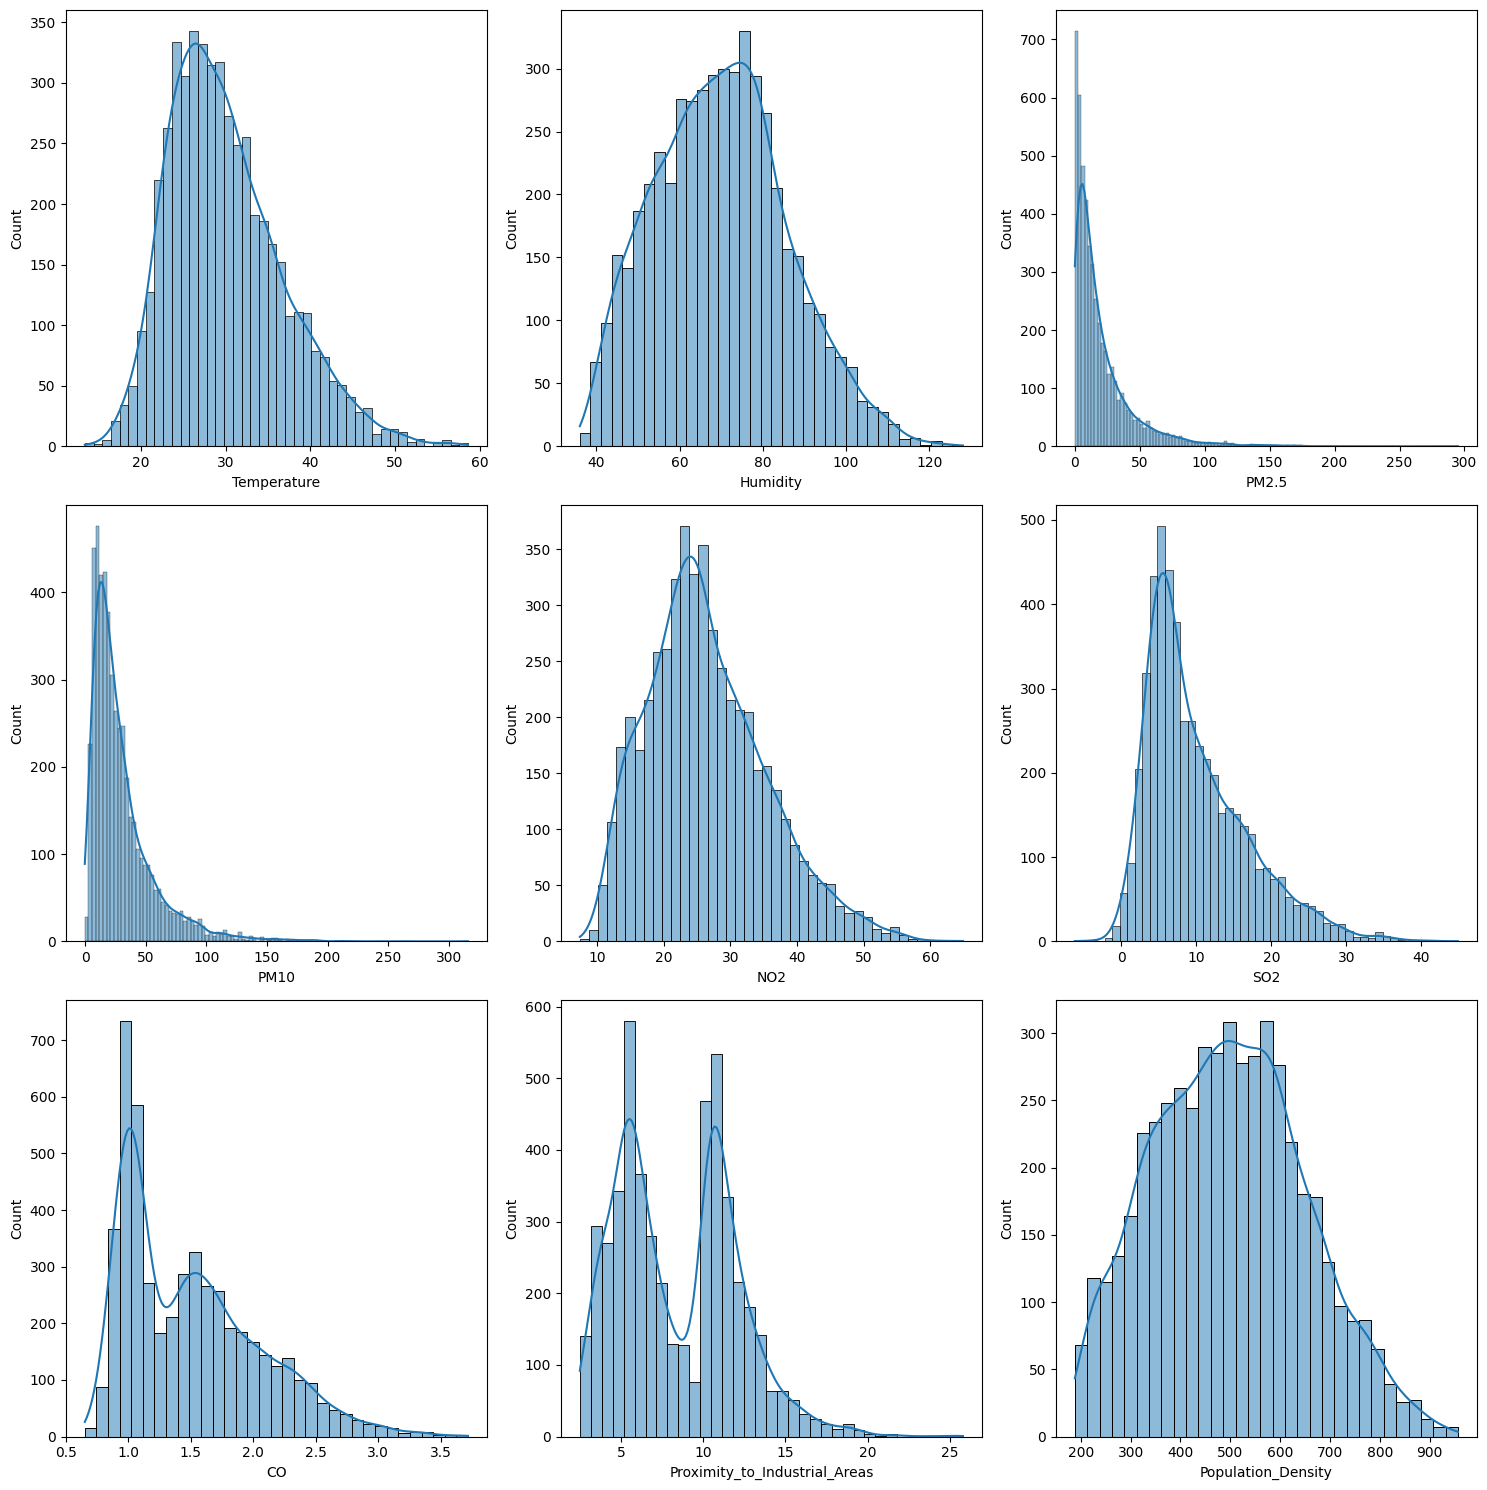

In [25]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
ax = ax.flatten()

i = 0
for col in X.columns :
    sns.histplot(data = X, x = col,  kde=True, ax=ax[i])
    i+=1
plt.tight_layout()